In [36]:
import pandas as pd

df = pd.read_csv("imdb_top_1000.csv")

In [37]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [39]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [40]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [41]:
df = df.dropna()  #drop null values

In [42]:
df = df.drop_duplicates()  #remove duplicates

In [47]:
import re

# Step 4: Data Type Conversion
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Runtime'] = df['Runtime'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else None)
df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
df['Meta_score'] = pd.to_numeric(df['Meta_score'], errors='coerce')
df['Gross'] = df['Gross'].apply(lambda x: int(re.sub(r'[^\d]', '', x)) if isinstance(x, str) else None)

# Step 5: Clean Genre Data
df['Genre'] = df['Genre'].apply(lambda x: re.split(', |,', x))

In [56]:
import ast
# Create a new DataFrame to store the genre counts
genre_counts = pd.Series(df['Genre'].explode()).value_counts()

print (genre_counts)

Drama        500
Adventure    163
Comedy       161
Crime        142
Action       140
Thriller      99
Biography     88
Romance       88
Mystery       70
Animation     63
Sci-Fi        56
Fantasy       55
Family        43
History       38
War           29
Music         27
Horror        18
Sport         17
Western       16
Musical       11
Film-Noir      6
Name: Genre, dtype: int64


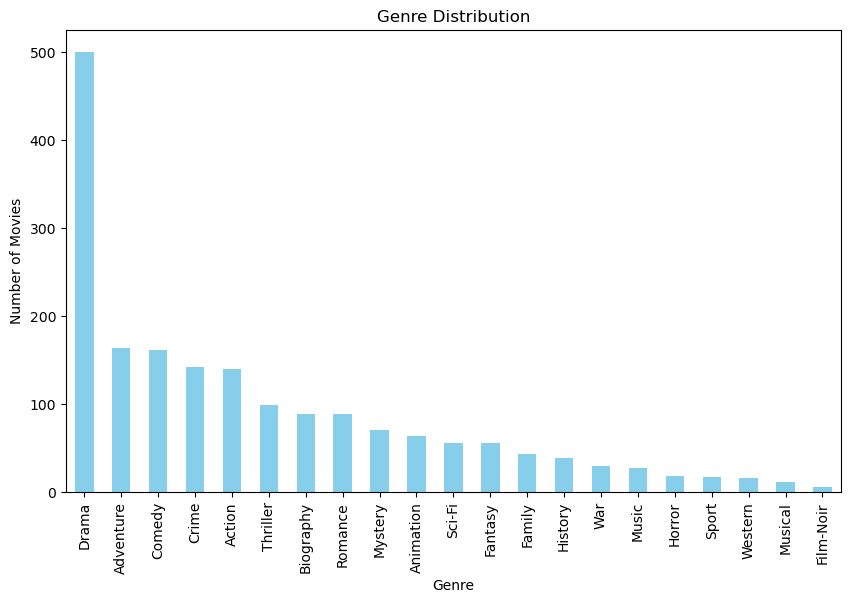

In [57]:
# Plot the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [60]:
#remove unnecessary columns
columns_to_remove = ['Poster_Link', 'Star1', 'Star2', 'Star3', 'Star4', 'Overview']
df = df.drop(columns=columns_to_remove, errors='ignore')

In [61]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994.0,A,142,[Drama],9.3,80.0,Frank Darabont,2343110,28341469
1,The Godfather,1972.0,A,175,"[Crime, Drama]",9.2,100.0,Francis Ford Coppola,1620367,134966411
2,The Dark Knight,2008.0,UA,152,"[Action, Crime, Drama]",9.0,84.0,Christopher Nolan,2303232,534858444
3,The Godfather: Part II,1974.0,A,202,"[Crime, Drama]",9.0,90.0,Francis Ford Coppola,1129952,57300000
4,12 Angry Men,1957.0,U,96,"[Crime, Drama]",9.0,96.0,Sidney Lumet,689845,4360000


In [62]:
df.to_csv('cleaned_dataset.csv', index=False)